In [35]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as figure
# import seaborn as sns  # you might not have this installed -- it makes graphs prettier and sometimes easier
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from sklearn import preprocessing
from random import sample
import glob, os 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from random import sample
import pickle

In [3]:
textFile = pd.read_csv("combinedDatasetfor6clusters(164298each).csv")

In [4]:
textFile.LABELS.value_counts() 

-1    164289
 7    164289
 4    164289
 1    164289
 0    164289
 3    164288
Name: LABELS, dtype: int64

In [8]:
textFile = textFile.sample(frac=1,random_state= 230)

In [9]:
textFile = textFile.reset_index(drop = True)

In [10]:
textFile.head()

,prefix,LABELS,bigramPref,pref_len
0,rsstest,7,^rsstest$,7
1,pc1-25,1,^pc1-25$,6
2,shavedrussians,7,^shavedrussians$,14
3,afc.acquiring.uat,0,^afc.acquiring.uat$,17
4,mirrorzsi,-1,^mirrorzsi$,9


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
XAll = textFile[['bigramPref','pref_len','prefix']]
target = textFile[['LABELS']]

In [13]:
qname_train, qname_test, label_train, label_test = train_test_split(XAll, target, test_size=0.2, random_state = 560)

In [14]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X_train = vectorizer.fit_transform(qname_train['bigramPref'])

In [49]:
filename = 'vectorizer'
outfile = open(filename,'wb')
pickle.dump(vectorizer,outfile)
outfile.close()

In [15]:
combined_train_X = hstack((X_train ,np.array(qname_train['pref_len'])[:,None])).tocsr()

In [16]:
combined_train_X

<788586x1595 sparse matrix of type '<class 'numpy.int64'>'
	with 13376171 stored elements in Compressed Sparse Row format>

In [17]:
X_test = vectorizer.transform(qname_test['bigramPref'])

In [18]:
combined_test_X = hstack((X_test,np.array(qname_test['pref_len'])[:,None])).tocsr()

In [19]:
combined_test_X

<197147x1595 sparse matrix of type '<class 'numpy.int64'>'
	with 3344497 stored elements in Compressed Sparse Row format>

In [20]:
testPrefix = combined_test_X.toarray()

In [21]:
testDataLargeData = pd.DataFrame.from_records(testPrefix)

In [29]:
len(testDataLargeData)

197147

In [30]:
testDataLargeData.head()

,0,1,2,3,4,5,6,7,8,9,...,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [27]:
testDataLargeData.loc[100].value_counts()

0     1576
1       16
2        2
19       1
Name: 100, dtype: int64

In [31]:
testDataLargeData.to_csv("testingDataSet.csv", index = False)

In [46]:
label_test.to_csv("testingLabels.csv", index = False)

In [32]:
model = LogisticRegression(solver= 'lbfgs')

In [33]:
model.fit(combined_train_X, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs fai

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
filename = 'LRModelLargeData'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

In [37]:
y_pred=model.predict(combined_test_X)
print("%.2f" %accuracy_score(label_test ,y_pred))

0.82


In [42]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,                          
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [-1, 0,1,3, 4, 7]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
#            /title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels())

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center",fontsize = 20,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Normalized confusion matrix


Text(0.5, 1.0, 'Confusion Matrix for 6 Clusters')

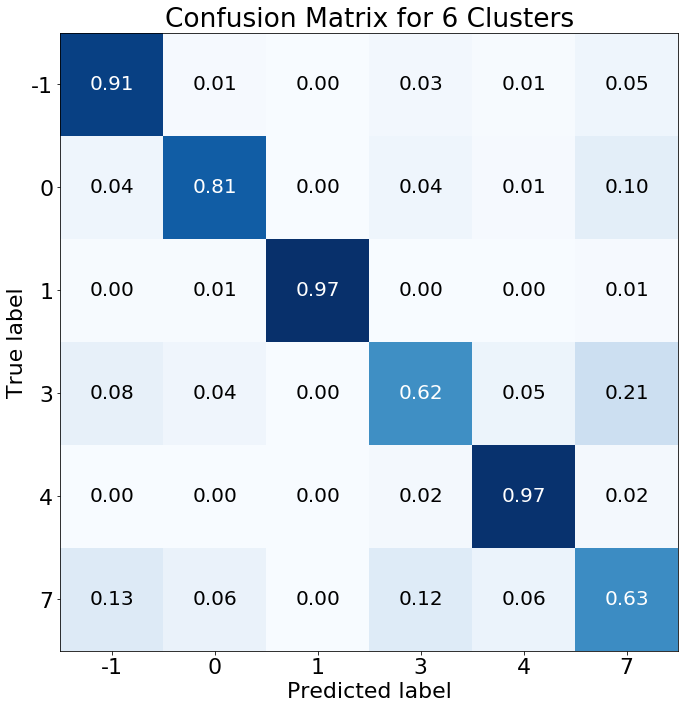

In [45]:
plt.rcParams.update({'font.size': 22})
plot_confusion_matrix(label_test, y_pred, classes=[-1, 0, 1, 3, 4, 7], normalize=True)
plt.title("Confusion Matrix for 6 Clusters")